## Task 1 - Assignment 3
## Sujai Rajan
## CS 6140

## Complementary Slackness Tutorial
In this tutorial, we will explain the concept of the Complementary Slackness condition using a 2D data example.

## Complementary Slackness in SVM

The Complementary Slackness condition is a fundamental concept in optimization, particularly in the context of convex optimization and support vector machines (SVM). In SVM, it establishes a relationship between the primal and dual problems, shedding light on the behavior of the solution.

# Step 1: Import Required Libraries
We'll start by importing the libraries that we'll need for this task.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

# Step 2: Generate Synthetic Data
In the following lines of code, we generate a simple synthetic 2D dataset which will serve as our test data for the SVM.
Our data consists of 40 samples each belonging to two different classes - 20 data points each from Positive and Negative classes.

In [2]:
# We generate a synthetic 2D dataset with two classes: positive and negative.
np.random.seed(1)
positive_data = np.random.randn(20, 2) + np.array([2, 2])
negative_data = np.random.randn(20, 2) + np.array([-2, -2])

### Synthetic Data Generation and Visualization

We start by generating a synthetic 2D dataset with two classes: positive and negative. The data is randomly sampled from Gaussian distributions centered around different mean points. By visualizing the dataset, we can observe the separation between the two classes.

# Step 3: Visualize the Data
We plot the 2 classes of data which should be visibly scattered around two different regions of the 2D plot because of the way we generated them. This visualization should indicate we could try learning a binary SVM.

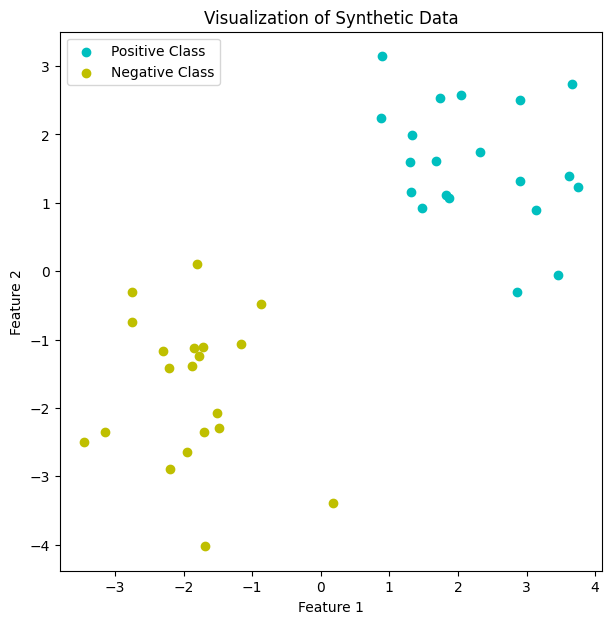

In [3]:
# We visualize the generated data by creating a scatter plot.
plt.figure(figsize=(7, 7))
plt.scatter(positive_data[:, 0], positive_data[:, 1], c='c', label='Positive Class')
plt.scatter(negative_data[:, 0], negative_data[:, 1], c='y', label='Negative Class')
plt.legend()
plt.title("Visualization of Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 4: Formulate the Lagrangian Optimization for SVM
Next, we formulate the optimization problem for SVM. The SVM parameters, including the data and labels, are defined. Additionally, we introduce helper functions for computing the Gram matrix and solving the dual SVM problem.

The Lagrangian Optimization problem for SVM involves finding the weights and bias that minimize the objective function while satisfying certain constraints. The objective function aims to maximize the margin between the classes while minimizing the misclassification errors. The constraints ensure that the data points are correctly classified.

In [4]:
# We define the SVM parameters, including the data and labels.
dimensions = 2
samples = positive_data.shape[0] + negative_data.shape[0]

data = np.vstack((positive_data, negative_data))
labels = np.vstack((np.ones((positive_data.shape[0], 1)), -1 * np.ones((negative_data.shape[0], 1))))


# Step 5: Solve the Dual SVM Problem
To solve the SVM problem, we need to compute the dual SVM problem using optimization techniques such as quadratic programming. Let's define helper functions to compute the Gram matrix and solve the dual SVM problem:

In [5]:
# We define helper functions to compute the Gram matrix and solve the dual SVM problem.
def Gram_matrix(data):
    samples, features = data.shape
    K = np.zeros((samples, samples))
    for i, x_i in enumerate(data):
        for j, x_j in enumerate(data):
            K[i, j] = np.dot(x_i, x_j)
    return K

def solve_dual_SVM(data, labels):
    samples, features = data.shape
    K = Gram_matrix(data)
    P = matrix(np.outer(labels, labels) * K)
    q = matrix(-1 * np.ones(samples))

    G = matrix(-np.eye(samples))
    h = matrix(np.zeros(samples))

    A = matrix(labels, (1, samples), 'd')
    b = matrix(0.0)

    solution = solvers.qp(P, q, G, h, A, b)
    return np.ravel(solution['x'])

# We solve the dual SVM problem and obtain the Lagrange multipliers (lambdas).
lambdas = solve_dual_SVM(data, labels)

     pcost       dcost       gap    pres   dres
 0: -3.3327e+00 -5.5752e+00  1e+02  1e+01  2e+00
 1: -1.6188e+00 -8.4180e-01  1e+01  1e+00  2e-01
 2: -5.5343e-02 -5.0462e-01  4e-01  5e-16  2e-15
 3: -1.9842e-01 -2.7509e-01  8e-02  6e-17  5e-16
 4: -2.6197e-01 -2.7213e-01  1e-02  1e-16  3e-16
 5: -2.6925e-01 -2.6953e-01  3e-04  1e-16  4e-16
 6: -2.6946e-01 -2.6946e-01  3e-06  1e-16  4e-16
 7: -2.6946e-01 -2.6946e-01  3e-08  6e-17  5e-16
Optimal solution found.


# Step 6: Compute Primal Parameters and Plot SVM Decision Boundary with Margins
After formulating the Lagrangian Optimization problem, we solve the dual SVM problem to obtain the Lagrange multipliers (also known as alpha values). From the alpha values, we can compute the primal parameters, namely the weight vector and bias.

To plot the SVM decision boundary and visualize the separation achieved by the SVM model, we can plot the decision boundary and margin lines. Support vectors play a crucial role in defining the decision boundary and the margin.

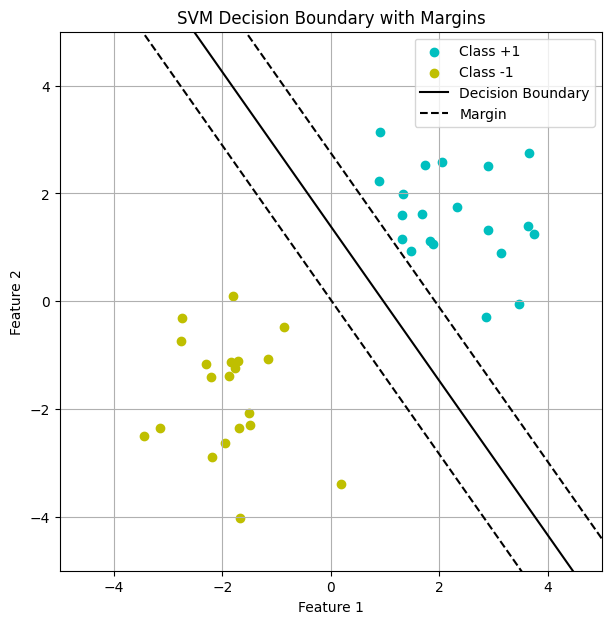

In [6]:
# We compute the primal parameters (weights and bias) and plot the SVM decision boundary with margins.
def Primal_parameters(lambdas, data, labels):
    weights = np.sum((lambdas * labels.T).T * data, axis=0)
    support_vectors_idx = np.where(lambdas > 1e-5)[0]
    bias = np.sum(labels[support_vectors_idx]) - np.sum(
        lambdas[support_vectors_idx] * labels[support_vectors_idx].T.dot(Gram_matrix(data)[support_vectors_idx, support_vectors_idx]))
    bias /= len(support_vectors_idx)
    return weights, bias

weights, bias = Primal_parameters(lambdas, data, labels)

def plot_SVM_decision_boundary(weights, bias, positive_data, negative_data):
    plt.figure(figsize=(7, 7))

    plt.scatter(positive_data[:, 0], positive_data[:, 1], c='c', label='Class +1')
    plt.scatter(negative_data[:, 0], negative_data[:, 1], c='y', label='Class -1')

    x = np.linspace(-5, 5)
    y = -(weights[0] /weights[1]) * x - bias / weights[1]

    margin = 1 / np.sqrt(np.sum(weights ** 2))
    upper_margin = y + margin
    lower_margin = y - margin

    plt.plot(x, y, 'k-', label='Decision Boundary')
    plt.plot(x, upper_margin, 'k--', label='Margin')
    plt.plot(x, lower_margin, 'k--')

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("SVM Decision Boundary with Margins")
    plt.legend()
    plt.grid()
    plt.show()

plot_SVM_decision_boundary(weights, bias, positive_data, negative_data)

# Step 7: Complementary Slackness
In the step below, we can calculate the ε slack variables and {α}'s by plugging in the values obtained from above back into their associated Complementary Slackness Conditions.
Applying the Complementary Slackness conditions is an important step in understanding the SVM solution. It allows us to calculate the alpha and epsilon slack variables, which provide insights into the support vectors and the violation of the margin.

The alpha values represent the Lagrange multipliers associated with the support vectors. For positive class support vectors, alpha values should be non-zero, indicating their importance in defining the decision boundary. Similarly, for negative class support vectors, alpha values should also be non-zero.

The epsilon values represent the slack variables that measure the violation of the margin by the training data. A non-zero epsilon value indicates that a data point lies within the margin or on the wrong side of the decision boundary. The magnitude of epsilon indicates the degree of violation.

In [7]:
# We calculate the alpha and epsilon slack variables by applying the Complementary Slackness conditions.
positive_alpha_indexes = np.argwhere(labels == 1).flatten()
negative_alpha_indexes = np.argwhere(labels == -1).flatten()

alpha = 1.0 * (np.inner(weights, data) + bias) - 1

alpha[positive_alpha_indexes] = np.fmax(0, alpha[positive_alpha_indexes])
alpha[negative_alpha_indexes] = np.fabs(np.fmin(0, alpha[negative_alpha_indexes]))

positive_epsilon_indexes = np.argwhere(labels == 1).flatten()
negative_epsilon_indexes = np.argwhere(labels == -1).flatten()

epsilon = labels - np.inner(weights, data) - bias

epsilon[positive_epsilon_indexes] = np.fmax(0, epsilon[positive_epsilon_indexes])
epsilon[negative_epsilon_indexes] = np.fabs(np.fmin(0, epsilon[negative_epsilon_indexes]))


# Step 8: Print and Analyze Results
After calculating the alpha and epsilon values, we can print and analyze the results. This step provides insights into the importance of support vectors and the extent of margin violation. By examining the calculated values, we can identify the support vectors and assess the degree of violation.

In [8]:
print('Alpha :', alpha)
print ('\n')
print('Epsilon :', epsilon)

result_alpha = np.where(alpha > 0)[0]
result_epsilon = np.where(epsilon > 0)[0]

Alpha : [0.         0.         0.01562046 1.19224285 0.54909008 0.47623933
 0.10637349 0.68210967 0.         0.73215402 0.28035594 1.21569817
 0.71678718 0.         0.52344591 0.         0.         0.05246191
 0.         1.77276097 4.11526783 3.36535008 3.86389037 2.62931884
 3.29511139 3.59413371 4.46132877 3.5060329  2.73051468 3.08294123
 3.55442888 3.44330695 3.36449462 2.30697147 2.89803509 4.70805734
 3.16228564 4.28656397 3.4631883  3.16808572]


Epsilon : [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.30697139 0.         ... 4.28656397 3.4631883  3.16808572]
 [0.         0.30697139 0.         ... 4.28656397 3.4631883  3.16808572]
 ...
 [3.18253028 1.69302861 2.01562046 ... 0.         0.         0.        ]
 [3.18253028 1.69302861 2.01562046 ... 0.         0.         0.        ]
 [3.18253028 1.69302861 2.01562046 ... 0.         0.         0.        ]]


From this tutorial we have learned how to generate synthetic data, visualize it, solve the dual SVM problem, compute primal parameters, and analyze the results.
Understanding the Complementary Slackness condition is crucial for comprehending the behavior and optimization of SVMs. It allows us to identify support vectors, assess margin violations, and make informed decisions in model training and evaluation.